In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle  
from sklearn.model_selection import train_test_split

from tensorflow.python import keras

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

from keras.models import Sequential
import copy

num_images=400

In [2]:
print(tf.__version__)

2.6.1


Modelo de la CNN

In [3]:
# data_dir=
# batch_size = 32
# img_height = 180
# img_width = 180

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [4]:
def returnPath(ch):
    path="/mit-imagenes/"
    agregar=""
    if ch == 'V':
        agregar="PVC"
    elif ch == '/':
        agregar="PAB"
    elif ch == 'R':
        agregar="RBB"
    elif ch == 'L':
        agregar="LBB"
    elif ch == 'A':
        agregar="APC"
    elif ch == '!':
        agregar="VFW"
    elif ch == 'E':
        agregar="VEB"
    elif ch == 'N':
        agregar="N"
    path=path+agregar+'/'              
    """se retornaría el path="/mit-imagenes/PVC/" """
    return path

In [5]:

def images_label(path_,tipo_):
    images_ = []
    labels_ = []
    
    path_='./mit-bih'+path_
    final_path_=""
    if tipo_=='N':
        final_path_=path_
    else:
        final_path_=path_+'cropping/'     #si no es N no tiene imagenes en cropping

    print(final_path_)
    count=0
    for filename in os.listdir(final_path_):
        #print(os.path.join(path_,filename))
        #print("The filename is",filename)
        img = cv2.imread(os.path.join(final_path_,filename))
        if img is not None:
            #print("is image")
            images_.append(img)
            labels_.append(tipo_)
            #output_.append((images_, labels_))
            count+=1
            #Only taking 900 images if it is N without cropping
            # if tipo_=='N' and count%900==0:
            #     break
        #Only taking 700 images if it is N without cropping
        if count%num_images==0:
            break    
    return images_, labels_

dicTipos =	{
  'V':0
  ,'/':1
  ,'R':2
  ,'L':3
  ,'A':4
  ,'!':5
  ,'E':6
  ,'N':7
}
tipos=['V','/','R','L','A','!','E','N']
images=[]
labels=[]
output=[]
for i in tipos:
    tipoPath=returnPath(i)
    newImages,newLabels=images_label(tipoPath,i)
    images=images+newImages
    labels=labels+newLabels
    output.append((newImages,newLabels))
print(np.shape(images))
print(np.shape(labels))


# (train_images, train_labels), (test_images, test_labels) = output
# train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
images=np.array(images)
labels=np.array(labels)

idLabels=[]
for i in labels:
    idLabels.append(dicTipos[i])
labels=np.array(idLabels)

images = np.array(images, dtype = 'float32')
print("images done")
print("labels", labels)
labels = np.array(labels, dtype = 'int32')


x_train=copy.deepcopy(images)
y_train=copy.deepcopy(labels)

#x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=4)

# print(np.shape(x_train))
# print(np.shape(y_train))

./mit-bih/mit-imagenes/PVC/cropping/
./mit-bih/mit-imagenes/PAB/cropping/
./mit-bih/mit-imagenes/RBB/cropping/
./mit-bih/mit-imagenes/LBB/cropping/
./mit-bih/mit-imagenes/APC/cropping/
./mit-bih/mit-imagenes/VFW/cropping/
./mit-bih/mit-imagenes/VEB/cropping/
./mit-bih/mit-imagenes/N/
(3200, 128, 128, 3)
(3200,)
images done
labels [0 0 0 ... 7 7 7]


Modelo de la CNN

In [6]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import time
start = time.time()


acc_per_fold=[]
loss_per_fold=[]
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(x_train, y_train):



    model = Sequential()
    IMAGE_SIZE=(128,128)
    model.add(layers.Conv2D(64, (3,3),strides = (1,1), input_shape = (128,128,3),kernel_initializer='glorot_uniform'))
    model.add(keras.layers.ELU())
    model.add(layers.BatchNormalization(momentum=0.01))

    model.add(layers.Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
    model.add(keras.layers.ELU())
    model.add(layers.BatchNormalization(momentum=0.01))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides= (2,2)))

    model.add(layers.Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
    model.add(keras.layers.ELU())
    model.add(layers.BatchNormalization(momentum=0.01))

    model.add(layers.Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
    model.add(keras.layers.ELU())
    model.add(layers.BatchNormalization(momentum=0.01))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides= (2,2)))

    model.add(layers.Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
    model.add(keras.layers.ELU())
    model.add(layers.BatchNormalization(momentum=0.01))

    model.add(layers.Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
    model.add(keras.layers.ELU())
    model.add(layers.BatchNormalization(momentum=0.01))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides= (2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(2048))
    model.add(keras.layers.ELU())
    model.add(layers.BatchNormalization(momentum=0.01))
    #model.add(layers.Dropout(0.5))

    model.add(layers.Dense(8, activation='softmax'))


    # Compile the model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    #history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))
    history = model.fit(x_train[train], y_train[train],
                batch_size=32,
                epochs=5)

    # Generate generalization metrics
    scores = model.evaluate(x_train[test], y_train[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
80/80 [==============================] - 231s 3s/step - loss: 1.0405 - accuracy: 0.8281
Epoch 2/5
80/80 [==============================] - 232s 3s/step - loss: 0.1018 - accuracy: 0.9727
Epoch 3/5
80/80 [==============================] - 232s 3s/step - loss: 0.0370 - accuracy: 0.9871
Epoch 4/5
80/80 [==============================] - 232s 3s/step - loss: 0.0390 - accuracy: 0.9891
Epoch 5/5
80/80 [==============================] - 230s 3s/step - loss: 0.0160 - accuracy: 0.9957
Score for fold 1: loss of 0.35317927598953247; accuracy of 95.6250011920929%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
80/80 [==============================] - 232s 3s/step - loss: 0.8765 - accuracy: 0.8398
Epoch 2/5
80/80 [==============================] - 234s 3s/step - loss: 0.0591 - accuracy: 0.9820
Epoch 3/5
80/80 [==========================

In [7]:

predicted=model.predict(x_train)
rounded_predictions=np.argmax(predicted,axis=1)



<Figure size 432x288 with 0 Axes>

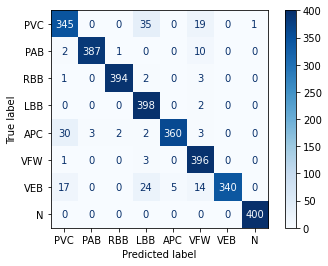

Accuracy:   0.94375


In [8]:
#Dibujar la matriz de confusion
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

fig = plt.figure(frameon=False)
cm=confusion_matrix(y_train,rounded_predictions)

#Displaying Confusion Matrix
ClasesArritmias=["PVC","PAB","RBB","LBB","APC","VFW","VEB","N"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ClasesArritmias)
disp.plot(cmap=plt.cm.Blues)
fig=disp.figure_
fig.savefig("ConfMatrix3200.png")
#disp.im_.imsave("geeks.jpg")
#disp.im_.savefig("geeks.jpg")
#plt.imsave("ConfMatrix.png",disp.im_)
plt.savefig("imagen.png")
plt.show()

temp = sum(y_train == rounded_predictions)
temp=temp/len(y_train)
print("Accuracy:  ", temp)

Entrenar el modelo

Evaluar el modelo